In [13]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import matplotlib.pyplot as plt
from config import key 
import seaborn as sns
import numpy as np
# connect to the database
engine = create_engine(key)
Base = automap_base()
Base.prepare(engine, reflect=True)

# save classes as variables, prepare classes
jobs = Base.classes.jobs
salaries = Base.classes.salaries
skills = Base.classes.skills

# query our database (pull data and save into objects)
session = Session(engine)

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_50404/1456277220.py:12: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [14]:
#Extract all 3 tables from Amazon RDS postgres database
jobs_table = session.query(jobs)
jobs_table

salaries_table = session.query(salaries)
salaries_table

skills_table = session.query(skills)
skills_table

In [15]:
# Requesting data from the table job 
job_data = session.query(jobs.id, jobs.title, jobs.company_name, jobs.location, jobs.via, jobs.extensions, jobs.posted_at, jobs.schedule_type, jobs.work_from_home, jobs.date_time)
rows_job = job_data.all()
rows_job

# convert into pandas DataFrame
jobs_df = pd.DataFrame(rows_job, columns =['id','title','company_name', 'location','via','extensions','posted_at','schedule_type','work_from_home','data_time'])
jobs_df.head()

#checking for null values 
#jobs_df.isnull().sum()

,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,data_time
0,0,Data Analyst Technical - Consultant,Intermountain Healthcare,"Oklahoma City, OK",via Monster,"['19 hours ago', 'Full-time', 'Health insurance']",19 hours ago,Full-time,None,00:10.1
1,1,"Sr Analyst, Data Engineer",Estee Lauder Companies,Oklahoma,via ZipRecruiter,"['12 hours ago', 'Full-time']",12 hours ago,Full-time,None,00:10.1
2,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,None,00:10.1
3,3,Data analyst,Modis,United States,via BeBee,"['13 hours ago', 'No degree mentioned']",13 hours ago,None,None,00:10.1
4,4,Data Analyst (Risk Adjustment Consulting Resea...,Cambia Health Solutions,United States,via LinkedIn,"['23 hours ago', 'Full-time', 'Health insuranc...",23 hours ago,Full-time,None,00:10.1


In [16]:
# Requesting data from the table Salaries 
Salaries_data = session.query(salaries.id, salaries.salary_pay, salaries.salary_rate, salaries.salary_avg, salaries.salary_min, salaries.salary_max, salaries.salary_hourly, salaries.salary_yearly, salaries.salary_standardized)
rows_salaries = Salaries_data.all()
rows_salaries

# convert into pandas DataFrame
salaries_df = pd.DataFrame(rows_salaries, columns=['id', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized'])
salaries_df.head()

#checking for null values 
#salaries_df.isnull().sum()


,id,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
0,0,None,None,None,None,None,None,None,None
1,1,None,None,None,None,None,None,None,None
2,2,21 to 23,an hour,22,21,23,22,None,45760
3,3,None,None,None,None,None,None,None,None
4,4,None,None,None,None,None,None,None,None


In [17]:
# Requesting data from the table skills 
skills_data = session.query(skills.id, skills.description_tokens)
rows_skills = skills_data.all()
rows_skills

# convert into pandas DataFrame
skills_df = pd.DataFrame(rows_skills, columns= ['id', 'description_tokens'])
skills_df.head()

#checking for null values 
#skills_df.isnull().sum()

,id,description_tokens
0,0,"['vba', 'spreadsheet', 'javascript', 'word', '..."
1,1,[]
2,2,[]
3,3,[]
4,4,"['sas', 'matlab', 'sql', 'spss', 'r']"


In [19]:
#joining all three tables on their primary key
merged = jobs_df.merge(salaries_df, on='id').merge(skills_df, on='id')
merged.head()


,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,data_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst Technical - Consultant,Intermountain Healthcare,"Oklahoma City, OK",via Monster,"['19 hours ago', 'Full-time', 'Health insurance']",19 hours ago,Full-time,None,00:10.1,None,None,None,None,None,None,None,None,"['vba', 'spreadsheet', 'javascript', 'word', '..."
1,1,"Sr Analyst, Data Engineer",Estee Lauder Companies,Oklahoma,via ZipRecruiter,"['12 hours ago', 'Full-time']",12 hours ago,Full-time,None,00:10.1,None,None,None,None,None,None,None,None,[]
2,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,None,00:10.1,21 to 23,an hour,22,21,23,22,None,45760,[]
3,3,Data analyst,Modis,United States,via BeBee,"['13 hours ago', 'No degree mentioned']",13 hours ago,None,None,00:10.1,None,None,None,None,None,None,None,None,[]
4,4,Data Analyst (Risk Adjustment Consulting Resea...,Cambia Health Solutions,United States,via LinkedIn,"['23 hours ago', 'Full-time', 'Health insuranc...",23 hours ago,Full-time,None,00:10.1,None,None,None,None,None,None,None,None,"['sas', 'matlab', 'sql', 'spss', 'r']"


In [20]:
merged.to_csv('joined_data.csv', index = False) 


In [21]:
# replacing all null values from work_from_home to false 
Work_F_Home = jobs_df['work_from_home']= jobs_df['work_from_home'].fillna(value = False)
Work_F_Home
jobs_df.isnull().sum()
jobs_df.head()




,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,data_time
0,0,Data Analyst Technical - Consultant,Intermountain Healthcare,"Oklahoma City, OK",via Monster,"['19 hours ago', 'Full-time', 'Health insurance']",19 hours ago,Full-time,False,00:10.1
1,1,"Sr Analyst, Data Engineer",Estee Lauder Companies,Oklahoma,via ZipRecruiter,"['12 hours ago', 'Full-time']",12 hours ago,Full-time,False,00:10.1
2,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,False,00:10.1
3,3,Data analyst,Modis,United States,via BeBee,"['13 hours ago', 'No degree mentioned']",13 hours ago,None,False,00:10.1
4,4,Data Analyst (Risk Adjustment Consulting Resea...,Cambia Health Solutions,United States,via LinkedIn,"['23 hours ago', 'Full-time', 'Health insuranc...",23 hours ago,Full-time,False,00:10.1


In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
from ast import literal_eval

mlb = MultiLabelBinarizer()

# convert description_tokens into col of lists
merged["description_tokens"]= merged["description_tokens"].apply(literal_eval)

# encode each skill as a unique column
binary_columns = mlb.fit_transform(skills_df["description_tokens"].tolist())
encode = merged.join(pd.DataFrame(binary_columns, columns=mlb.classes_, index=skills_df.index))
encode 



,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,data_time,...,q,r,s,t,u,v,w,x,y,z
0,0,Data Analyst Technical - Consultant,Intermountain Healthcare,"Oklahoma City, OK",via Monster,"['19 hours ago', 'Full-time', 'Health insurance']",19 hours ago,Full-time,None,00:10.1,...,1,1,1,1,0,1,1,1,1,0
1,1,"Sr Analyst, Data Engineer",Estee Lauder Companies,Oklahoma,via ZipRecruiter,"['12 hours ago', 'Full-time']",12 hours ago,Full-time,None,00:10.1,...,0,0,0,0,0,0,0,0,0,0
2,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,None,00:10.1,...,0,0,0,0,0,0,0,0,0,0
3,3,Data analyst,Modis,United States,via BeBee,"['13 hours ago', 'No degree mentioned']",13 hours ago,None,None,00:10.1,...,0,0,0,0,0,0,0,0,0,0
4,4,Data Analyst (Risk Adjustment Consulting Resea...,Cambia Health Solutions,United States,via LinkedIn,"['23 hours ago', 'Full-time', 'Health insuranc...",23 hours ago,Full-time,None,00:10.1,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11201,11201,Senior Data Analyst,Oracle,"Jefferson City, MO",via Trabajo.org,"['19 hours ago', 'Full-time', 'Health insuranc...",19 hours ago,Full-time,None,00:11.6,...,1,1,1,1,1,0,1,1,0,0
11202,11202,Principal Data Analyst,Fidelity Investments,"Tishomingo, OK",via JobiLike,"['18 hours ago', 'Full-time']",18 hours ago,Full-time,None,00:11.6,...,1,0,1,0,0,0,1,0,0,0
11203,11203,Senior Data Analyst,Oracle,"Kansas City, MO",via Trabajo.org,"['13 hours ago', 'Full-time', 'Health insuranc...",13 hours ago,Full-time,None,00:11.6,...,1,0,1,0,0,0,0,0,0,0
11204,11204,Principal Data Analyst,Fidelity Investments,"Marietta, OK",via JobiLike,"['18 hours ago', 'Full-time']",18 hours ago,Full-time,None,00:11.6,...,1,0,1,0,0,0,1,0,0,0


In [23]:
#save dataframe into a csv file
encode.to_csv('encoded_data.csv', index = False) 


In [24]:
#dropping null values in the salary_standardized column
salaries_df[salaries_df['salary_standardized'].isnull()]
droped_df = merged.dropna(subset= ['salary_standardized'])
droped_df

clean_df = droped_df['work_from_home']= droped_df['work_from_home'].fillna(value = False)
clean_df

droped_df

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_50404/421870568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df = droped_df['work_from_home']= droped_df['work_from_home'].fillna(value = False)


,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,data_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
2,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,False,00:10.1,21 to 23,an hour,22,21,23,22,None,45760,[]
11,11,Lead Data Analyst,Laka & Company,"Bentonville, AR",via LinkedIn,"['10 hours ago', '100K to 140K a year', 'Full-...",10 hours ago,Full-time,False,00:12.6,100K to 140K,a year,120000,100000,140000,None,120000,120000,"[c, ssrs, sql, ssis, python, azure]"
20,20,Junior Data Analyst,Educated Solutions Corp,United States,via My Stateline Jobs,"['8 hours ago', '25 to 26 an hour', 'Full-time...",8 hours ago,Full-time,False,00:14.4,25 to 26,an hour,25.5,25,26,25.5,None,53040,"[excel, word]"
58,58,Healthcare Data Analyst,Pediatrics Northwest,United States,via Job,"['4 hours ago', '25 an hour', 'Full-time', 'He...",4 hours ago,Full-time,False,00:21.9,25,an hour,25,None,None,25,None,52000,[]
63,63,Program Management Data Analyst,Citi,United States,via Big Country Jobs,"['8 hours ago', '73,570 to 110,350 a year', 'F...",8 hours ago,Full-time,False,00:24.4,73570 to 110350,a year,91960,73570,110350,None,91960,91960,"[sharepoint, sas, excel]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,11174,SPSS ANCOVA analysis & psychological write up,Upwork,Anywhere,via Upwork,"['23 hours ago', '25 to 35 an hour', 'Work fro...",23 hours ago,Contractor,True,00:42.4,25 to 35,an hour,30,25,35,30,None,62400,[spss]
11179,11179,Fix Google Indexing Issue and set up analytics,Upwork,Anywhere,via Upwork,"['11 hours ago', '16 to 45 an hour', 'Work fro...",11 hours ago,Contractor,True,00:42.4,16 to 45,an hour,30.5,16,45,30.5,None,63440,[]
11194,11194,Statistician spss,Upwork,Anywhere,via Upwork,"['14 hours ago', '10 to 15 an hour', 'Work fro...",14 hours ago,Contractor,True,00:09.7,10 to 15,an hour,12.5,10,15,12.5,None,26000,[]
11200,11200,Sales analysis on raw data for an E-Commerce S...,Upwork,Anywhere,via Upwork,"['17 hours ago', '16 to 45 an hour', 'Work fro...",17 hours ago,Contractor,True,00:09.7,16 to 45,an hour,30.5,16,45,30.5,None,63440,[]


In [25]:
droped_df.to_csv('clean_data.csv', index = False) 


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib as plt 
cd_df = pd.read_csv('data/clean_data.csv')
cd_df.head(5)
#sns.displot(cd_df['salary_standardized'], bins = 30) 


#cd_df.hist(column = "salary_standardized")

#cd_df['salary_standardized'].dtype 
cd_df["salary_standardized"] = cd_df["salary_standardized"].astype(float)

ValueError: could not convert string to float: '[]'

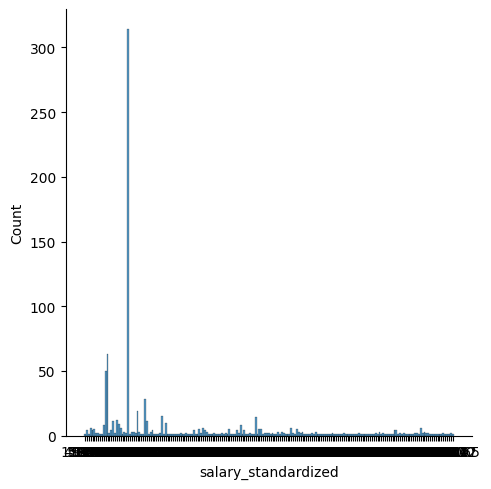

In [37]:
cd_df2 = pd.read_csv('data/joined_data.csv')
cd_df2.head()
sns.displot(cd_df2['salary_standardized'][(cd_df2['work_from_home'] == 'False')])

<AxesSubplot: xlabel='salary_standardized', ylabel='Count'>

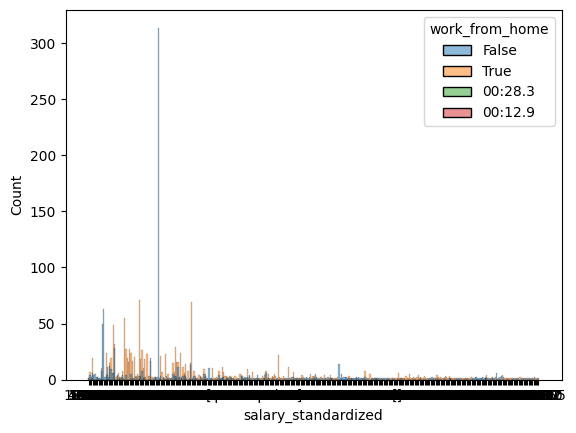

In [41]:
sns.histplot(data= cd_df2, x=cd_df2['salary_standardized'], hue = 'work_from_home')

In [42]:
remote_df = cd_df2['work_from_home'] == True 
remote_df

0        False
1        False
2        False
3        False
4        False
         ...  
11204    False
11205    False
11206    False
11207    False
11208    False
Name: work_from_home, Length: 11209, dtype: bool